In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
pip install -r yolov5/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [31]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/anveshsk/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-21 Python-3.8.5 torch-1.10.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
img = 'neymar.jpeg'
img2 = 'traffic.jpeg'

In [7]:
results = model(img)
results.print()

image 1/1: 2300x4089 1 person
Speed: 214.8ms pre-process, 216.7ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)


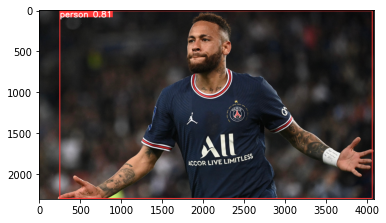

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results2 = model(img2)
results2.print()

image 1/1: 408x612 22 cars
Speed: 26.0ms pre-process, 227.5ms inference, 1.3ms NMS per image at shape (1, 3, 448, 640)


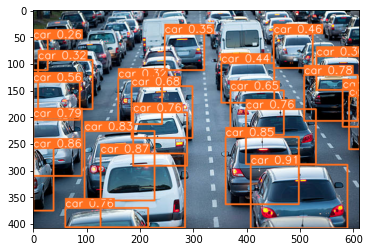

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [32]:
import uuid   # Unique identifier
import os
import time

In [23]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [24]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [19]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.6d07d8de-214b-11ed-a93e-acde48001122.jpg


In [20]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   


data/images/awake.6f2234c0-214b-11ed-a93e-acde48001122.jpg
data/images/awake.6f223740-214b-11ed-a93e-acde48001122.jpg
data/images/awake.6f223934-214b-11ed-a93e-acde48001122.jpg
data/images/awake.6f223af6-214b-11ed-a93e-acde48001122.jpg
data/images/awake.6f223cb8-214b-11ed-a93e-acde48001122.jpg
data/images/drowsy.6f223f10-214b-11ed-a93e-acde48001122.jpg
data/images/drowsy.6f2240d2-214b-11ed-a93e-acde48001122.jpg
data/images/drowsy.6f224280-214b-11ed-a93e-acde48001122.jpg
data/images/drowsy.6f224438-214b-11ed-a93e-acde48001122.jpg
data/images/drowsy.6f2245e6-214b-11ed-a93e-acde48001122.jpg


In [21]:
!git clone https://brew install qt  # Install qt-5.x.x by Homebrew


Cloning into 'labelImg'...
remote: Enumerating objects: 2090, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 2090 (delta 43), reused 78 (delta 34), pack-reused 1986
Receiving objects: 100% (2090/2090), 232.91 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (1229/1229), done.


In [26]:
!pip3 install pyqt5 lxml --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 25.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 33.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 25.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [27]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [30]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-34-ge0700cc Python-3.8.5 torch-1.10.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     8/499        0G   0.07761   0.02645   0.05918        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40    0.00843          1     0.0626     0.0228

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     9/499        0G   0.07026   0.02909   0.05654        25       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40    0.00796          1       0.11     0.0422

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/499        0G   0.06931   0.02558   0.05424        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.106      0.522      0.271     0.0914

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.598      0.553      0.397      0.221

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    34/499        0G   0.06056   0.01746   0.03449        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.529      0.357      0.602      0.269

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    35/499        0G   0.07038   0.01589   0.03213        19       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.591       0.53        0.4      0.183

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    36/499        0G   0.05794   0.01568   0.03152        18       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    59/499        0G   0.04658   0.01522   0.03088        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.641      0.667      0.505      0.242

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    60/499        0G   0.04788   0.01559   0.02899        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.641      0.667      0.505      0.242

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/499        0G   0.03867   0.01547   0.03092        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.621      0.612      0.514      0.333

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.825      0.577      0.647      0.409

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    85/499        0G   0.03717   0.01646   0.02904        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40       0.84      0.632       0.66      0.422

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    86/499        0G   0.03588   0.01546    0.0276        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.807      0.611      0.641      0.411

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    87/499        0G   0.03876   0.01283   0.02732        24       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   110/499        0G    0.0342   0.01224   0.02369        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40       0.78      0.591      0.649      0.333

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   111/499        0G   0.03694    0.0121   0.02555        19       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.903      0.449      0.619      0.313

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   112/499        0G   0.04135   0.01291   0.02368        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.903      0.449      0.619      0.313

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.814       0.65      0.623      0.403

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   136/499        0G   0.03537   0.01258   0.01943        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.814       0.65      0.623      0.403

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   137/499        0G   0.03639   0.01242   0.02106        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.817      0.667      0.673      0.466

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   138/499        0G   0.03283   0.01186   0.01914        15       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   161/499        0G   0.03537   0.01231   0.01603        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.978      0.652      0.682      0.444

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   162/499        0G   0.03255   0.01322   0.01291        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.965      0.646       0.68      0.476

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   163/499        0G   0.02966   0.01213   0.01468        25       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.871      0.638      0.666      0.405

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.976      0.667       0.68      0.437

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   187/499        0G   0.03784   0.01092   0.01514        14       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.985      0.667       0.68      0.473

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   188/499        0G   0.02975   0.01503   0.01211        31       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.985      0.667       0.68      0.473

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   189/499        0G   0.02635   0.01236   0.01327        25       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   212/499        0G   0.02884   0.01252   0.00989        21       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.987      0.667       0.68      0.472

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   213/499        0G   0.03122   0.01181     0.013        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40      0.989      0.667       0.68      0.484

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   214/499        0G   0.02829    0.0113   0.01281        19       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         40         40       0.99      0.667       0.68      0.489

     Epoch   gpu_mem       box      

In [43]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/anveshsk/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-21 Python-3.8.5 torch-1.10.1 CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [44]:
img = os.path.join('data', 'images', 'awake.8ae551d2-214c-11ed-a93e-acde48001122.jpg')
img2 = os.path.join('data', 'images', 'drowsy.af1ef242-214c-11ed-a93e-acde48001122.jpg')

In [45]:
results = model(img)
results2 = model(img2)

In [46]:
results.print()

image 1/1: 720x1280 1 awake
Speed: 20.0ms pre-process, 156.1ms inference, 0.4ms NMS per image at shape (1, 3, 384, 640)


In [47]:
results2.print()

image 1/1: 720x1280 1 drowsy
Speed: 14.4ms pre-process, 140.8ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


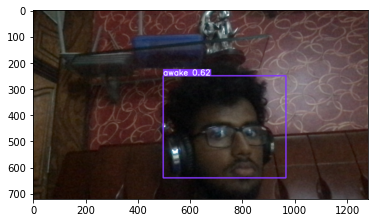

In [48]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

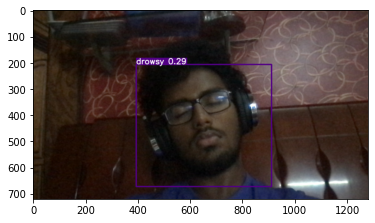

In [49]:
%matplotlib inline 
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [50]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1